## Importing important modules

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Loading the MNIST dataset

Loading the train dataset

In [2]:
# Load the MNIST dataset from google for handwritten digits recognisition
mnist = tfds.load("mnist", split="train", as_supervised=True)
mnist = mnist.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist = mnist.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Loading the test dataset

In [3]:
# Evaluating the model
mnist_test = tfds.load('mnist', split="test", as_supervised=True)
mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

Defining the CNN model

In [4]:
# Define the model using relu activation function and softmax activation
# Softmax activation is commonly used for the output layer in multi-class classification tasks.
# Data set is digit recognisition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Dynamic focal loss function

In [5]:
def dynamic_focal_loss(y_true, y_pred, alpha=0.25):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    p_t = tf.math.exp(-binary_cross_entropy)

    alpha = 0.25

    # Calculate the difficulty as the difference between the predicted probability of the true class
    # and the maximum predicted probability across all classes
    max_pred_prob = tf.reduce_max(y_pred, axis=1)
    true_class_prob = tf.reduce_sum(y_true * y_pred, axis=1)
    difficulty = tf.abs(true_class_prob - max_pred_prob)

    # Calculate the adaptive gamma value as the difficulty
    gamma = tf.exp(-difficulty)

    # Calculate the focal loss
    focal_loss = alpha * (1 - p_t) ** gamma * binary_cross_entropy

    return focal_loss

Training the model

Epoch 1/30
938/938 [==============================] - 5s 3ms/step - loss: 3.2545e-05 - accuracy: 0.9998
Epoch 2/30
938/938 [==============================] - 4s 2ms/step - loss: 9.5707e-05 - accuracy: 0.9987
Epoch 3/30
938/938 [==============================] - 5s 3ms/step - loss: 4.1238e-05 - accuracy: 0.9996
Epoch 4/30
938/938 [==============================] - 4s 2ms/step - loss: 1.1780e-05 - accuracy: 1.0000
Epoch 5/30
938/938 [==============================] - 4s 2ms/step - loss: 9.2678e-06 - accuracy: 1.0000
Epoch 6/30
938/938 [==============================] - 4s 2ms/step - loss: 7.2796e-05 - accuracy: 0.9991
Epoch 7/30
938/938 [==============================] - 4s 2ms/step - loss: 1.1978e-04 - accuracy: 0.9982
Epoch 8/30
938/938 [==============================] - 4s 3ms/step - loss: 1.7475e-05 - accuracy: 0.9999
Epoch 9/30
938/938 [==============================] - 3s 2ms/step - loss: 7.9152e-06 - accuracy: 1.0000
Epoch 10/30
938/938 [==============================] - 4s 2ms/st

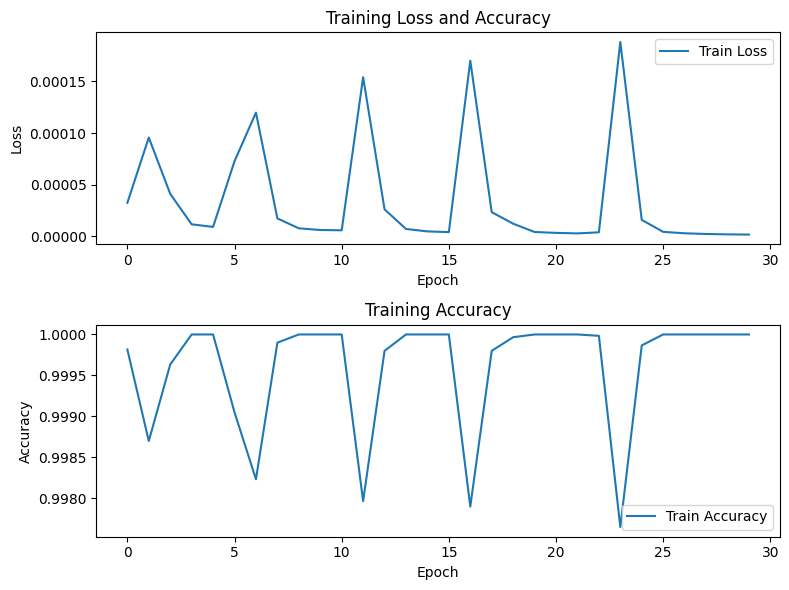

In [8]:
# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=dynamic_focal_loss, metrics=['accuracy'])

# Training the model
history = model.fit(mnist, epochs=30)

# Plotting the graph of training loss and accuracy
plt.figure(figsize=(8, 6))

# Plot training loss values
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss'], loc='upper right')

# Plot training accuracy values
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy'], loc='lower right')

plt.tight_layout()
plt.show()

Evaluating the model

In [9]:
loss, accuracy = model.evaluate(mnist_test)

print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


157/157 [==============================] - 2s 9ms/step - loss: 0.0025 - accuracy: 0.9824
Test Loss: 0.002463872078806162, Test Accuracy: 0.9824000000953674
